In [1]:
println("test git PM")
println("test git LL")

test git PM
test git LL


In [2]:
# In this script I want to solve the system of odes for assembling two 3-membered rings  
# with synthesis and degradation NOT included 
# Name: Leo Lagunes and Paige M.
# Date: 07/14/21 

# Last update: 08/24/21

# IMPORTANT NOTE: The equations were written and developed by Dr. Koan Briggs, this code was developed by LL + PM

#skip this cell if you've run it before
#import Pkg; Pkg.precompile()
#Pkg.add("Plots")
#using Pkg
#using Plots; gr()
#Pkg.add("DifferentialEquations")
#using DifferentialEquations

#println("Almost ready!")
#Pkg.update()
#ENV["GRDIR"]=""
#Pkg.build("GR")
#println("Ready bitch!")
#println("............")

In [3]:
# This cell contains all the functions + packages to run everything

#------------------------------------
#--- List of packages here ---
#------------------------------------
using DifferentialEquations
using Plots; gr()
# -----------------------------------
# --- Solve the system of ode's -----
# -----------------------------------
function StackedRings_sd(paramvaluesList)
    x0Val, kOn, δ, Q = paramvaluesList
    p = kOn, δ, Q
    keff(i,j)= c0^(-i-j+1)*kOn*(kd1)^i*(kd2)^j*ℯ^(-(i+j-1)*ΔGp/(Rconst*T))
    function TwoStackedRingsSystem!(dx, x, p, t)
        dx[1] = kOn*x[1]*(-6*x[1] -4*x[2] -3*x[3] - 3*x[4] -2*x[5] -3*x[6] -2*x[7] - 2*x[8] -3*x[9] -2*x[10]-x[11]) + 2*keff(0,1)*x[2] +2*keff(1,0)*x[3] + keff(1,0)*x[4] + keff(0,1)*x[4] + 2*keff(1,0)*x[5] + keff(1,0)*x[6] + keff(0,1)*x[6] + 2*keff(1,0)*x[7] + 4*keff(1,1)*x[8] + 3*keff(2,0)*x[9] + 2*keff(2,0)*x[10] + keff(0,1)*x[10] + 2*keff(2,1)*x[11] + keff(2,0)*x[11] + 2*keff(1,1)*x[11] + 6*keff(2,1)*x[12] - δ*x[1] + Q
        dx[2] = kOn*((x[1])^2-4*x[1]*x[2]-8*(x[2])^2 -2*x[2]*x[3]-2*x[2]*x[4]-2*x[2]*x[6]-2*x[2]*x[8]) - keff(0,1)*x[2]+keff(1,0)*x[4]+keff(1,0)*x[6]+2*keff(2,0)*x[8]+keff(2,0)*x[10]+2*keff(3,0)*x[11] + 3*keff(4,0)*x[12] -δ*x[2]
        dx[3] = kOn*(2*(x[1])^2 -3*x[1]*x[3] -2*x[2]*x[3] -6*(x[3])^2 -x[3]*x[4]-x[3]*x[6]-3*x[3]*x[9] - x[3]*x[10]) - keff(1,0)*x[3] + keff(0,1)*x[4]+2*keff(0,1)*x[5] + keff(0,1)*x[6]+2*keff(0,1)*x[7]+ 2*keff(0,2)*x[8] + 3*keff(2,0)*x[9]+keff(2,0)*x[10]+2*keff(2,1)*x[11] + keff(0,2)*x[11] + 6*keff(2,2)*x[12] - δ*x[3]
        dx[4] = kOn*(2*x[1]*x[2] + x[1]*x[3] - 3*x[1]*x[4]-2*x[2]*x[4] -x[3]*x[4]-2*(x[4])^2) - keff(1,0)*x[4] - keff(0,1)*x[4] + 2*keff(1,0)*x[5] +2*keff(1,1)*x[8]+ keff(2,0)*x[10] + keff(3,0)*x[11] + keff(2,1)*x[11] + 6*keff(4,1)*x[12] - δ*x[4]
        dx[5] = kOn*(x[1]*x[4]- 2*x[1]*x[5] + (x[3])^2) -2*keff(1,0)*x[5] -keff(0,1)*x[5] + keff(2,1)*x[11] - δ*x[5]
        dx[6] = kOn*(2*x[1]*x[2]+x[1]*x[3] -3*x[1]*x[6]-2*x[2]*x[6] - x[3]*x[6]-2*(x[6])^2)-keff(1,0)*x[6] - keff(0,1)*x[6] + 2*keff(1,0)*x[7] + 2*keff(1,1)*x[8] + keff(2,0)*x[10] + keff(3,0)*x[11] + keff(2,1)*x[11] + 6*keff(4,1)*x[12] - δ*x[6]
        dx[7] = kOn*(x[1]*x[6] -2*x[1]*x[7] + (x[3])^2) - 2*keff(1,0)*x[7] - keff(0,1)*x[7] + keff(2,1)*x[11] - δ*x[7]
        dx[8] = kOn*(x[1]*x[4] + x[1]*x[6] -2*x[1]*x[8]+4*(x[2])^2 - 2*x[2]*x[8] + (x[3])^2) - 4*keff(1,1)*x[8] - keff(2,0)*x[8] - keff(0,2)*x[8] + keff(2,0)*x[11] + 3*keff(4,0)*x[12] - δ*x[8]
        dx[9] = kOn*(x[1]*x[3] -3*x[1]*x[9] - 3*x[3]*x[9]-6*(x[9])^2) -3*keff(2,0)*x[9] + keff(0,1)*x[10] + keff(0,2)*x[11] + 2*keff(0,3)*x[12] - δ*x[9]
        dx[10] = kOn*(x[1]*x[4] + x[1]*x[6]+3*x[1]*x[9]-2*x[1]*x[10]+2*x[2]*x[3]-x[3]*x[10]) -3*keff(2,0)*x[10] -keff(0,1)*x[10]+2*keff(1,1)*x[11] +6*keff(2,2)*x[12] - δ*x[10]
        dx[11] = kOn*(2*x[1]*x[5] +2*x[1]*x[7] +2*x[1]*x[8] +2*x[1]*x[10]-x[1]*x[11]+2*x[2]*x[4]  + 2*x[2]*x[6] +x[3]*x[4] +x[3]*x[6]+3*x[3]*x[9]) -4*keff(2,1)*x[11] -keff(2,0)*x[11] -2*keff(1,1)*x[11] -2*keff(3,0)*x[11] -keff(0,2)*x[11] +6*keff(2,1)*x[12] - δ*x[11]
        dx[12] = kOn*(x[1]*x[11]+2*x[2]*x[8] +x[3]*x[10] +(x[4])^2 +(x[6])^2 +3*(x[9])^2) -6*keff(2,1)*x[12] -3*keff(4,0)*x[12]-6*keff(2,2)*x[12] -6*keff(4,1)*x[12] -keff(0,3)*x[12] -δ*x[12]
    end
    x0=[x0Val; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0]
    # --- parameter values ---
    # print parameter values 
    #println("kOn: ", kOn)
    #println("kd1: ", kd1)
    #println("kd2:", kd2)
    #println("delta: ", δ)
    #println("q: ", Q)
    #println("c0:", c0)


    # --- time span --- 
    #tspan = (0.000001, 10.0^9)
    tspan = (0.000001, 10.0^12)

    # --- ode solver --- 
    #println("---")
    #println("Solving - fixed parameter set...")
    prob = ODEProblem(TwoStackedRingsSystem!,x0,tspan,p)
    sol = solve(prob,Rosenbrock23(autodiff=false), abstol = 1e-12, reltol = 1e-12);
    # sol = solve(prob,TRBDF2());
    #println("Solved ")
    return sol
end

println("Solve Differential Equations: StackedRings_sd(paramvaluesList)")

# ---------------------------------------
# --- Solve the system of ode's NEW -----
# ---------------------------------------
function StackedRings_EJD(paramvaluesList)
    x0Val, kOn, δ, Q = paramvaluesList
    p = kOn, δ, Q
    keff(i,j)= c0^(-i-j+1)*kOn*(kd1)^i*(kd2)^j*ℯ^(-(i+j-1)*ΔGp/(Rconst*T))
    function TwoStackedRingsSystem!(dx, x, p, t)
        dx[1] = - 2*kOn*0.5*x[1]*x[1] + 1*keff(1,0)*x[2] - 2*kOn*0.5*x[1]*x[1] + 1*keff(1,0)*x[2] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[3] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[3] - 1*kOn*1*x[1]*x[2] + 3*keff(2,0)*x[4] - 1*kOn*1*x[1]*x[2] + 1*keff(0,1)*x[5] - 1*kOn*1*x[1]*x[2] + 1*keff(0,1)*x[6] - 2*kOn*1*x[1]*x[3] + 1*keff(1,0)*x[6] - 2*kOn*1*x[1]*x[3] + 1*keff(1,0)*x[5] - 3*kOn*1*x[1]*x[4] + 1*keff(0,1)*x[7] - 1*kOn*1*x[1]*x[5] + 1*keff(2,0)*x[7] - 1*kOn*1*x[1]*x[5] + 2*keff(1,0)*x[8] - 1*kOn*1*x[1]*x[5] + 2*keff(1,1)*x[9] - 1*kOn*1*x[1]*x[6] + 1*keff(2,0)*x[7] - 1*kOn*1*x[1]*x[6] + 2*keff(1,1)*x[9] - 1*kOn*1*x[1]*x[6] + 2*keff(1,0)*x[10] - 2*kOn*1*x[1]*x[7] + 2*keff(1,1)*x[11] - 2*kOn*1*x[1]*x[8] + 1*keff(2,1)*x[11] - 2*kOn*1*x[1]*x[9] + 1*keff(2,0)*x[11] - 2*kOn*1*x[1]*x[10] + 1*keff(2,1)*x[11] - 1*kOn*1*x[1]*x[11] + 6*keff(2,1)*x[12]   
        dx[2] = + 2*kOn*0.5*x[1]*x[1] - 1*keff(1,0)*x[2] - 1*kOn*1*x[1]*x[2] + 3*keff(2,0)*x[4] - 1*kOn*1*x[1]*x[2] + 1*keff(0,1)*x[5] - 1*kOn*1*x[1]*x[2] + 1*keff(0,1)*x[6] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,2)*x[9] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,2)*x[9] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,1)*x[10] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,1)*x[10] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,1)*x[8] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,1)*x[8] - 2*kOn*1*x[2]*x[3] + 1*keff(2,0)*x[7] - 3*kOn*1*x[2]*x[4] + 1*keff(0,2)*x[11] - 1*kOn*1*x[2]*x[5] + 1*keff(2,1)*x[11] - 1*kOn*1*x[2]*x[6] + 1*keff(2,1)*x[11] - 1*kOn*1*x[2]*x[7] + 6*keff(2,2)*x[12]
        dx[3] = + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,1)*x[3] - 2*kOn*1*x[1]*x[3] + 1*keff(1,0)*x[6] - 2*kOn*1*x[1]*x[3] + 1*keff(1,0)*x[5] - 2*kOn*1*x[2]*x[3] + 1*keff(2,0)*x[7] - 4*kOn*0.5*x[3]*x[3] + 1*keff(2,0)*x[9] - 4*kOn*0.5*x[3]*x[3] + 1*keff(2,0)*x[9] - 2*kOn*1*x[3]*x[5] + 1*keff(3,0)*x[11] - 2*kOn*1*x[3]*x[6] + 1*keff(3,0)*x[11] - 2*kOn*1*x[3]*x[9] + 3*keff(4,0)*x[12]  
        dx[4] = + 1*kOn*1*x[1]*x[2] - 3*keff(2,0)*x[4] - 3*kOn*1*x[1]*x[4] + 1*keff(0,1)*x[7] - 3*kOn*1*x[2]*x[4] + 1*keff(0,2)*x[11] - 3*kOn*0.5*x[4]*x[4] + 1*keff(0,3)*x[12] - 3*kOn*0.5*x[4]*x[4] + 1*keff(0,3)*x[12]  
        dx[5] = + 1*kOn*1*x[1]*x[2] - 1*keff(0,1)*x[5] + 2*kOn*1*x[1]*x[3] - 1*keff(1,0)*x[5] - 1*kOn*1*x[1]*x[5] + 1*keff(2,0)*x[7] - 1*kOn*1*x[1]*x[5] + 2*keff(1,0)*x[8] - 1*kOn*1*x[1]*x[5] + 2*keff(1,1)*x[9] - 1*kOn*1*x[2]*x[5] + 1*keff(2,1)*x[11] - 2*kOn*1*x[3]*x[5] + 1*keff(3,0)*x[11] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[12] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[12]    
        dx[6] = + 1*kOn*1*x[1]*x[2] - 1*keff(0,1)*x[6] + 2*kOn*1*x[1]*x[3] - 1*keff(1,0)*x[6] - 1*kOn*1*x[1]*x[6] + 1*keff(2,0)*x[7] - 1*kOn*1*x[1]*x[6] + 2*keff(1,1)*x[9] - 1*kOn*1*x[1]*x[6] + 2*keff(1,0)*x[10] - 1*kOn*1*x[2]*x[6] + 1*keff(2,1)*x[11] - 2*kOn*1*x[3]*x[6] + 1*keff(3,0)*x[11] - 1*kOn*0.5*x[6]*x[6] + 3*keff(4,1)*x[12] - 1*kOn*0.5*x[6]*x[6] + 3*keff(4,1)*x[12]     
        dx[7] = + 3*kOn*1*x[1]*x[4] - 1*keff(0,1)*x[7] + 1*kOn*1*x[1]*x[5] - 1*keff(2,0)*x[7] + 1*kOn*1*x[1]*x[6] - 1*keff(2,0)*x[7] - 2*kOn*1*x[1]*x[7] + 2*keff(1,1)*x[11] + 2*kOn*1*x[2]*x[3] - 1*keff(2,0)*x[7] - 1*kOn*1*x[2]*x[7] + 6*keff(2,2)*x[12]  
        dx[8] = + 1*kOn*1*x[1]*x[5] - 2*keff(1,0)*x[8] - 2*kOn*1*x[1]*x[8] + 1*keff(2,1)*x[11] + 1*kOn*0.5*x[2]*x[2] - 1*keff(0,1)*x[8]  
        dx[9] = + 1*kOn*1*x[1]*x[5] - 2*keff(1,1)*x[9] + 1*kOn*1*x[1]*x[6] - 2*keff(1,1)*x[9] - 2*kOn*1*x[1]*x[9] + 1*keff(2,0)*x[11] + 1*kOn*0.5*x[2]*x[2] - 1*keff(0,2)*x[9] + 4*kOn*0.5*x[3]*x[3] - 1*keff(2,0)*x[9] - 2*kOn*1*x[3]*x[9] + 3*keff(4,0)*x[12]   
        dx[10] = + 1*kOn*1*x[1]*x[6] - 2*keff(1,0)*x[10] - 2*kOn*1*x[1]*x[10] + 1*keff(2,1)*x[11] + 1*kOn*0.5*x[2]*x[2] - 1*keff(0,1)*x[10]  
        dx[11] = + 2*kOn*1*x[1]*x[7] - 2*keff(1,1)*x[11] + 2*kOn*1*x[1]*x[8] - 1*keff(2,1)*x[11] + 2*kOn*1*x[1]*x[9] - 1*keff(2,0)*x[11] + 2*kOn*1*x[1]*x[10] - 1*keff(2,1)*x[11] - 1*kOn*1*x[1]*x[11] + 6*keff(2,1)*x[12] + 3*kOn*1*x[2]*x[4] - 1*keff(0,2)*x[11] + 1*kOn*1*x[2]*x[5] - 1*keff(2,1)*x[11] + 1*kOn*1*x[2]*x[6] - 1*keff(2,1)*x[11] + 2*kOn*1*x[3]*x[5] - 1*keff(3,0)*x[11] + 2*kOn*1*x[3]*x[6] - 1*keff(3,0)*x[11]  
        dx[12] = 1*kOn*1*x[1]*x[11] - 6*keff(2,1)*x[12] + 1*kOn*1*x[2]*x[7] - 6*keff(2,2)*x[12] + 2*kOn*1*x[3]*x[9] - 3*keff(4,0)*x[12] + 3*kOn*0.5*x[4]*x[4] - 1*keff(0,3)*x[12] + 1*kOn*0.5*x[5]*x[5] - 3*keff(4,1)*x[12] + 1*kOn*0.5*x[6]*x[6] - 3*keff(4,1)*x[12]
    end
    x0=[x0Val; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0]

    # --- time span --- 
    #tspan = (0.000001, 10.0^9)
    tspan = (0.000001, 10.0^12)

    # --- ode solver --- 
    #println("---")
    #println("Solving - fixed parameter set...")
    prob = ODEProblem(TwoStackedRingsSystem!,x0,tspan,p)
    sol = solve(prob,Rosenbrock23(autodiff=false), abstol = 1e-12, reltol = 1e-12);
    # sol = solve(prob,TRBDF2());
    #println("Solved ")
    return sol
end

println("Solve Differential Equations: StackedRings_EJD(paramvaluesList)")
#-----------------------
# --- Assembly Yeild ---
#-----------------------
function assemblyYield(solRaw)
    # this function will return the assembly yield value at the last time point 
    # Yn = n*Xn/XT
    #print(sol.u)
    Yn = 0 
    sol=solRaw
    n=12; #XN = sol(end,:); println(XN)
    listSol=[t.+2u for (u,t) in zip(sol.u,sol.t)];
    # This will give the concentratiions of each species at time point 0.01 
    #sol(0.01)
    tEnd = 10^6; t0 = 0.0
    #print(solRaw)
    timePts = solRaw.t; totPts = length(timePts);
    allSols = solRaw.u; #print(allSols)
    slntEnd_pre = allSols[totPts,:]; slntEnd = slntEnd_pre[1]
    # --- calculate Xn = X12 ---
    nSpec = length(slntEnd); 
    Xn = slntEnd[nSpec]
    # --- calculate XT --- 
    cnt = 1; XT = 0
    for it in slntEnd
        addIt = cnt*it
        XT += addIt
        cnt += 1
    end
    # --- calculate Yn ---
    Yn = n*Xn/XT;
    
    return Yn
    
end

println("get AY w/ last time point: assemblyYield(solRaw)")

#-----------------------------
# --- plot the time course ---
#-----------------------------
function plotTimeCourse(sol,AY)
    # sol = stackedRings_sd(paramvaluesList)
    # This function will plot the time course for the solved odes and label the AY at the last time point
    AYrnd = round(AY,digits=5)
    p1=plot(sol,linewidth=2,title="Stacked rings + synth/deg with AY= $AYrnd",xaxis = ("Time (t)",:log ),
         yaxis="x(t)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"] ) # legend=false
    # add a line at 1
    # hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
    display(p1)
    println("Plot done!")

    # sol.t[end],sol[end]
    println("Saving file...")
    #savefig("C:\\plot_2SR_0720_001.png")
    println("Figure saved")
    
end 

println("to get time course: plotTimeCourse(sol, AY)")

#-----------------------
# --- AY time course ---
#-----------------------

function AYtimeCourse(solRaw)
    #This function will return the Assembly yield for every time point in a time course for the last species x12
    # --- empty list/initialization --- #
    list_AY=[]
    Yn = 0 
    sol=solRaw
    n=12; #XN = sol(end,:); println(XN)
    listSol=[t.+2u for (u,t) in zip(sol.u,sol.t)];
    # This will give the concentratiions of each species at time point 0.01 
    #sol(0.01)
    tEnd = 10^6; t0 = 0.0
    #print(solRaw)
    timePts = solRaw.t; totPts = length(timePts); # print("total time points: ", totPts)
    allSols = solRaw.u; #print(allSols)
    for tp_i = 1:totPts
        #println("item in loop: ")
        # print("time: ", tp_i, "\n")
        #print(tp_i)
        # slntEnd_pre = allSols[totPts,:]; slntEnd = slntEnd_pre[1]
        slntEnd_pre = allSols[tp_i,:]; slntEnd = slntEnd_pre[1]
        # --- calculate Xn = X12 ---
        nSpec = length(slntEnd); 
        Xn = slntEnd[nSpec]
        # --- calculate XT --- 
        cnt = 1; XT = 0
        for it in slntEnd
            addIt = cnt*it
            XT += addIt
            cnt += 1
        end
        # --- calculate Yn ---
        Yn = n*Xn/XT; # add this to the AY list
        # print("AY at ti= ", Yn)
        push!(list_AY, Yn)
    end 
    # print("all tps: ", timePts)
    return list_AY, timePts   
end

println("AY Time course: AYtimecourse(solRaw)")

#----------------------------
# --- plot AY time course ---
#----------------------------
function plotAYtimeCourse(list_AY, timePts)
    # print("total pts: ", length(timePts), "\n")
    #print("--")
    # this function will plot the AY time course give the AY list and the time points 
    p2=plot(timePts,list_AY,linewidth=2,title="Stacked rings Assembly Yield + NO synth/deg",xaxis = ("Time (t)",:log ),
         yaxis="AY(t)", label = ["x12"], legend=:bottomright ) # legend=false
    # add a line at 1
    # hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
    display(p2)
    println("Plot done!")

    # sol.t[end],sol[end]
    #println("Saving file...")
    #savefig("C:\\plot_2SR_0816_AY_001.png")
    #println("Figure saved")
    
end 

println("to plot time course: plotAYtimeCourse(list_AY, timePts)")

#----------------------------
# --- calculate AY vs IC  ---
#----------------------------
function calcAYvsIC(nICpts,minDeg, maxDeg)
    # this function will calculate AY for different initial condition values at each time point but only for the x12 species 
    # nICpts = number of initial condition points to consider
    mags = LinRange(minDeg, maxDeg,nICpts)
    allICs = 10 .^mags
    # allICs = [10^-8, 10^-5, 10^-3]

    # initialize lists to store
    AY_list = []
    # loop to solve AY for each IC 
    for icVal in allICs # loop through all the IC values
        #x0Val=10^-4; 
        x0Val=icVal; #print(x0Val)
        # solve the system
        paramvaluesList= x0Val, kOn, δ, Q
        sol = StackedRings_sd(paramvaluesList);
        # calculate AY 
        ayVali = assemblyYield(sol); #print(ayVali)
        # store value of AY 
        push!(AY_list, ayVali)
    end 
    
    return allICs, AY_list
    
end 
println("to calculate AY vs IC: calcAYvsIC(nICpts)")

#----------------------------
# --- plot AY vs IC curve ---
#----------------------------
function plotAYvsIC_curve(allICs, AY_list)
    # This function will plot the AY for increasing Initial Conditions 
    p3=plot(allICs,AY_list,linewidth=2, linecolor=:red,title="Stacked rings Assembly Yield vs Initial Conditions",xaxis = ("Initial Concentration (M)",:log ),
         yaxis="Assembly Yield",legend=false ) # legend=false
    # add a line at 1
    # hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
    display(p3)
    println("Plot done!")

    # sol.t[end],sol[end]
    #println("Saving file...")
    #savefig("C:\\plot_ICvsAY_0824.png")
    #println("Figure saved")
end 
# println("to plot AY vs IC: plotAYvsIC_curve(allICs, AY_list)")
println("to plot AY vs IC: plotAYvsIC_curve(allICs, AY_list)")

Solve Differential Equations: StackedRings_sd(paramvaluesList)
Solve Differential Equations: StackedRings_EJD(paramvaluesList)
get AY w/ last time point: assemblyYield(solRaw)
to get time course: plotTimeCourse(sol, AY)
AY Time course: AYtimecourse(solRaw)
to plot time course: plotAYtimeCourse(list_AY, timePts)
to calculate AY vs IC: calcAYvsIC(nICpts)
to plot AY vs IC: plotAYvsIC_curve(allICs, AY_list)


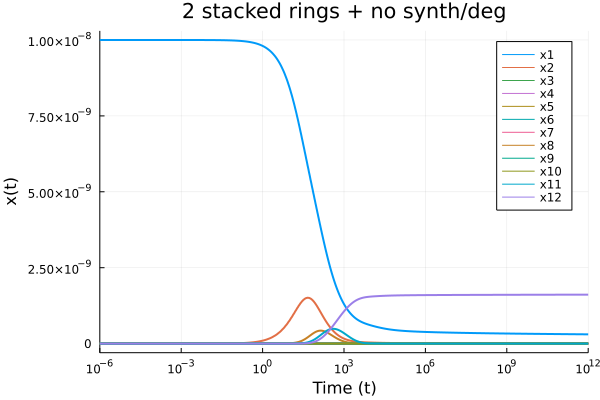

Plot done!
Saving file...
Figure saved


In [4]:
#-------------------------------
# --- parameter values here ---
#-------------------------------
c0=1 # 1M
kd1 = 10^-3 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-8 #between ring (intra)
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
x0Val=10^-8; # x0 M
paramvaluesList= x0Val, kOn, δ, Q

#---------------------------------
# --- solve fixed parameter ex ---
#---------------------------------
sol = StackedRings_sd(paramvaluesList)

p1=plot(sol,linewidth=2,title="2 stacked rings + no synth/deg",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"] ) # legend=false
# add a line at 1
# hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
display(p1)
println("Plot done!")

# sol.t[end],sol[end]
println("Saving file...")
#savefig("C:\\plot_2SR_0715_003.png")
println("Figure saved")

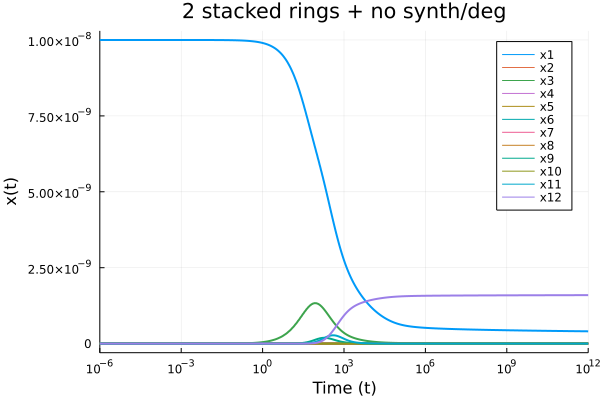

Plot done!
Saving file...
Figure saved


In [4]:
# LL - new equations from EJD



#-------------------------------
# --- parameter values here ---
#-------------------------------
c0=1 # 1M
kd1 = 10^-3 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-8 #between ring (intra)
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
x0Val=10^-8; # x0 M
paramvaluesList= x0Val, kOn, δ, Q

#---------------------------------
# --- solve fixed parameter ex ---
#---------------------------------
sol = StackedRings_EJD(paramvaluesList)

p1=plot(sol,linewidth=2,title="2 stacked rings + no synth/deg",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"] ) # legend=false
# add a line at 1
# hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
display(p1)
println("Plot done!")

# sol.t[end],sol[end]
println("Saving file...")
#savefig("C:\\plot_2SR_0715_003.png")
println("Figure saved")

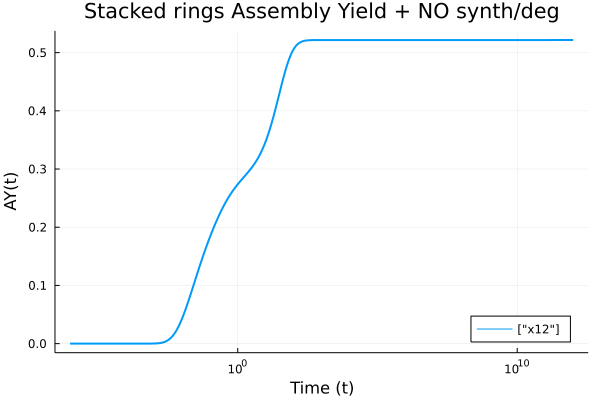

Plot done!


In [5]:
#-------------------------------
# --- AY time course curve -----
#-------------------------------
c0=1
kd1 = 10^-8 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-8 #between ring (intra)
ΔGp = 9
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
#--- initial condition ---
#tic() # check time elapsed
x0Val=10^-4; kOn = 10^6 #tolerances set to 10^-12 in stacked ring solver, cusp behavoir around x0val~ big
paramvaluesList= x0Val, kOn, δ, Q
sol = StackedRings_sd(paramvaluesList)

aytc_01 = AYtimeCourse(sol);
list_AY=aytc_01[1]; timePts=aytc_01[2]
plotAYtimeCourse(list_AY, timePts)
#toc()


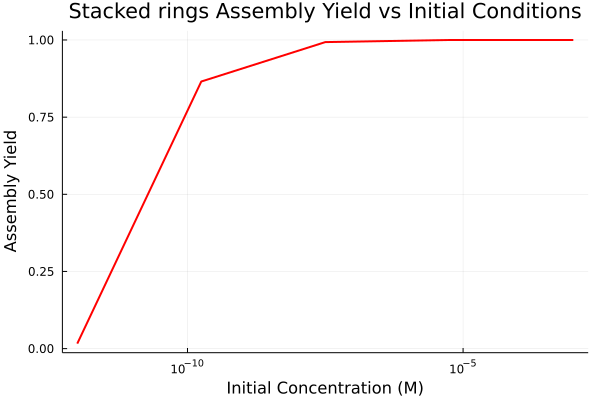

Red done!


In [6]:
#-------------------------------
# --- IC vs AY curve ---
#-------------------------------

# IC vs Ay --- LL 

# fixed parameters
c0=1 # 1M
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 

nICpts=5;minDeg=-12; maxDeg=-3

# --- change these to generate highlighted curves --- 
# - red curve -
kd1 = 10^-12 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-3 #between ring (intra)
allAYvsIC_red = calcAYvsIC(nICpts,minDeg, maxDeg)
println("Red done!")

allICs= allAYvsIC_red[1]; AYvals=allAYvsIC_red[2]

mycolors = [:red :green :orange :blue :purple]
p3=plot(allICs,AYvals,linewidth=2, linecolor=:match, color = mycolors,title="Stacked rings Assembly Yield vs Initial Conditions",xaxis = ("Initial Concentration (M)",:log ),
         yaxis="Assembly Yield",legend=false ) # legend=false
display(p3)



In [7]:
#-------------------------------
# --- IC vs AY curve ---
#-------------------------------

# IC vs Ay --- LL 

# fixed parameters
c0=1 # 1M
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 

nICpts=15;minDeg=-12; maxDeg=-3
# --- change these to generate highlighted curves --- 
# - red curve -
kd1 = 10^-12 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-3 #between ring (intra)
allAYvsIC_red = calcAYvsIC(nICpts,minDeg, maxDeg)
println("Red done!")

# - green - 
kd1 = 10^-12 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-12 #between ring (intra)
allAYvsIC_green = calcAYvsIC(nICpts,minDeg, maxDeg)
println("Green done!")

# - orange - 
kd1 = 10^-8 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-8 #between ring (intra)
allAYvsIC_orange = calcAYvsIC(nICpts,minDeg, maxDeg)
println("Orange done!")

# - blue - 
kd1 = 10^-3 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-3 #between ring (intra)
allAYvsIC_blue = calcAYvsIC(nICpts,minDeg, maxDeg)
println("Blue done!")

# - purple - 
kd1 = 10^-3 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-12 #between ring (intra)
allAYvsIC_purple = calcAYvsIC(nICpts,minDeg, maxDeg)
println("Purple done!")

# --- plot all the curves ----
AYvsIC_curves = [allAYvsIC_red, allAYvsIC_green, allAYvsIC_orange, allAYvsIC_blue, allAYvsIC_purple]

mycolors = [:red :green :orange :blue :purple]
p3=plot(AYvsIC_curves,linewidth=2, linecolor=:match, color = mycolors,title="Stacked rings Assembly Yield vs Initial Conditions",xaxis = ("Initial Concentration (M)",:log ),
         yaxis="Assembly Yield",legend=false ) # legend=false
display(p3)




Red done!
Green done!
Orange done!


┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/paigemh/.julia/packages/SciMLBase/cA7Re/src/integrator_interface.jl:331


LoadError: InterruptException:

In [27]:
#----------------
#--- KD1 v AY ---
#----------------
# by PM

# fixed parameters
#-------------------------------
# --- parameter values here ---
#-------------------------------
c0=1 # 1M
kd1 = 10^-3 #within a ring (inter) #the bigger the KD to weaker
#kd2 = 10^-8 #between ring (intra)
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
x0Val=10^-8; # x0 M

#--- if kd1 remains defined globally uncomment
#kd1= nothing #clears kd1 value globally
#GC.gc() #runs garbage collector

function calcAYvsKD1(nKD1,minKD1, maxKD1) #number of steps, min, max
    # this function will calculate AY for different KD1 (inter) values at each time point but only for the x12 species 
    # nIKD1 = number of initial condition points to consider
    AllKD1s = []
    for i in LinRange(minKD1, maxKD1,nKD1)#start, stop, number of steps
        KD1=10^i
        push!(AllKD1s, KD1)
    end
    #println(AllKD1s)

    # initialize lists to store
    AY_list = []
    # loop to solve AY for each KD 
    #println("before for loop is good")
    for KD1s in AllKD1s # loop through all the KD1 values
        kd1=KD1s
        #println(kd1)
        paramvaluesList= x0Val, kOn, δ, Q
        sol = StackedRings_sd(paramvaluesList);
        # calculate AY 
        ayVali = assemblyYield(sol); #print(ayVali)
        # store value of AY 
        push!(AY_list, ayVali)
    end 
    
    return AllKD1s, AY_list
    
end 

calcAYvsKD1 (generic function with 1 method)

In [28]:
calcAYvsKD1(3,4,6)#number of steps, min, max

LoadError: InterruptException:

In [29]:
AY_list=[]
c0=1 # 1M
kd2 = 10^-6 #between ring (intra)
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
x0Val=10^-8; # x0 M

In [31]:
kd1 = 10^-3 #within a ring (inter) #the bigger the KD to weaker
paramvaluesList= x0Val, kOn, δ, Q
sol = StackedRings_sd(paramvaluesList);
p7=plot(sol,linewidth=2,title="2 stacked rings + no synth/deg",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"] ) # legend=false
# add a line at 1
# hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
display(p7)
println("Plot done!")
#ayVali = assemblyYield(sol); #print(ayVali)
#push!(AY_list, ayVali)

LoadError: InterruptException: